### TPC Benchmarking  
Results Plotting  

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

import config

In [24]:
test = "TPC-DS"
scale_factor = "100"

In [25]:
fps = config.fp_results + config.sep + "tpc-ds_single_queries"
fps

'/home/colin/code/bq_snowflake_benchmark/results/tpc-ds_single_queries'

In [26]:
fps_results = glob.glob(fps + "/*_*_results*")

In [27]:
fps_time = glob.glob(fps + "/*_*_times*")

In [28]:
d = []
for fp in fps_time:
    df = pd.read_csv(fp, index_col=None, header=0)
    d.append(df)

df = pd.concat(d, axis=0, ignore_index=True)

In [29]:
fps[0]

'/'

In [30]:
if "query" in fps_time[0]:
    x_type = "query_n"
else:
    x_type = "stream_p"

In [31]:
df.head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,query_plan,cost
0,bq,ds,100,ds_1GB_01,stream_01_test,96,2020-05-08 00:23:51.114000+00:00,2020-05-08 00:23:52.203000+00:00,68235614,69206016.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN
1,bq,ds,100,ds_1GB_01,stream_01_test,7,2020-05-08 00:23:54.616000+00:00,2020-05-08 00:23:56.672000+00:00,227931059,228589568.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN
2,bq,ds,100,ds_1GB_01,stream_01_test,75,2020-05-08 00:23:58.144000+00:00,2020-05-08 00:24:01.554000+00:00,216333580,217055232.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN
3,bq,ds,100,ds_1GB_01,stream_01_test,44,2020-05-08 00:24:03.190000+00:00,2020-05-08 00:24:03.967000+00:00,89618261,90177536.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN
4,bq,ds,100,ds_1GB_01,stream_01_test,39,2020-05-08 00:24:05.256000+00:00,2020-05-08 00:24:15.420000+00:00,746066432,746586112.0,{},NaN


In [32]:
df = df.sort_values(by="bq_dataset")

In [33]:
df["description"] = df.db + "_" + df.desc

In [34]:
df.t0 = pd.to_datetime(df.t0)
df.t1 = pd.to_datetime(df.t1)

df["dt"] = df.t1 - df.t0
df["dt_s"] = df.dt.dt.total_seconds()

In [35]:
df[df.db == "sf"].head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,query_plan,cost,description,dt,dt_s
197,sf,ds,100,ds_100GB_01,stream_01_test,76,2020-05-07 17:32:01.270439,2020-05-07 17:32:01.490344,-1,NaN,NaN,0.000123,sf_stream_01_test,00:00:00.219905,0.219905
125,sf,ds,100,ds_100GB_01,stream_01_test,63,2020-05-07 17:30:48.425815,2020-05-07 17:30:48.577248,-1,NaN,NaN,0.000085,sf_stream_01_test,00:00:00.151433,0.151433
126,sf,ds,100,ds_100GB_01,stream_01_test,69,2020-05-07 17:30:48.660981,2020-05-07 17:30:49.319833,-1,NaN,NaN,0.000369,sf_stream_01_test,00:00:00.658852,0.658852
127,sf,ds,100,ds_100GB_01,stream_01_test,60,2020-05-07 17:30:49.446311,2020-05-07 17:30:49.727847,-1,NaN,NaN,0.000158,sf_stream_01_test,00:00:00.281536,0.281536
128,sf,ds,100,ds_100GB_01,stream_01_test,59,2020-05-07 17:30:49.813184,2020-05-07 17:30:49.967080,-1,NaN,NaN,0.000086,sf_stream_01_test,00:00:00.153896,0.153896


In [36]:
df[df.db == "bq"].head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,query_plan,cost,description,dt,dt_s
0,bq,ds,100,ds_1GB_01,stream_01_test,96,2020-05-08 00:23:51.114000+00:00,2020-05-08 00:23:52.203000+00:00,68235614,69206016.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_stream_01_test,00:00:01.089000,1.089
96,bq,ds,100,ds_1GB_01,stream_01_test,61,2020-05-08 00:31:19.696000+00:00,2020-05-08 00:31:21.404000+00:00,137577653,138412032.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_stream_01_test,00:00:01.708000,1.708
26,bq,ds,100,ds_1GB_01,stream_01_test,63,2020-05-08 00:26:00.454000+00:00,2020-05-08 00:26:01.607000+00:00,91792663,92274688.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_stream_01_test,00:00:01.153000,1.153
27,bq,ds,100,ds_1GB_01,stream_01_test,69,2020-05-08 00:26:02.624000+00:00,2020-05-08 00:26:05.463000+00:00,164974180,165675008.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_stream_01_test,00:00:02.839000,2.839
28,bq,ds,100,ds_1GB_01,stream_01_test,60,2020-05-08 00:26:06.732000+00:00,2020-05-08 00:26:08.168000+00:00,161213300,161480704.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_stream_01_test,00:00:01.436000,1.436


In [37]:
dfp_dt = df.pivot(index=x_type, columns="db", values="dt_s")
dfp_bp = df.pivot(index=x_type, columns="db", values="bytes_processed")

In [38]:
def bytes_to_TebiByte(b):
    return b / 1099511627776

In [39]:
dfp_bp = dfp_bp.apply(bytes_to_TebiByte)

### Plot Results

In [40]:
sns.set_style("darkgrid", {"xtick.bottom":True})

In [41]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
set2 = sns.color_palette("Set2", 8)
hls = sns.hls_palette(n_colors=12)

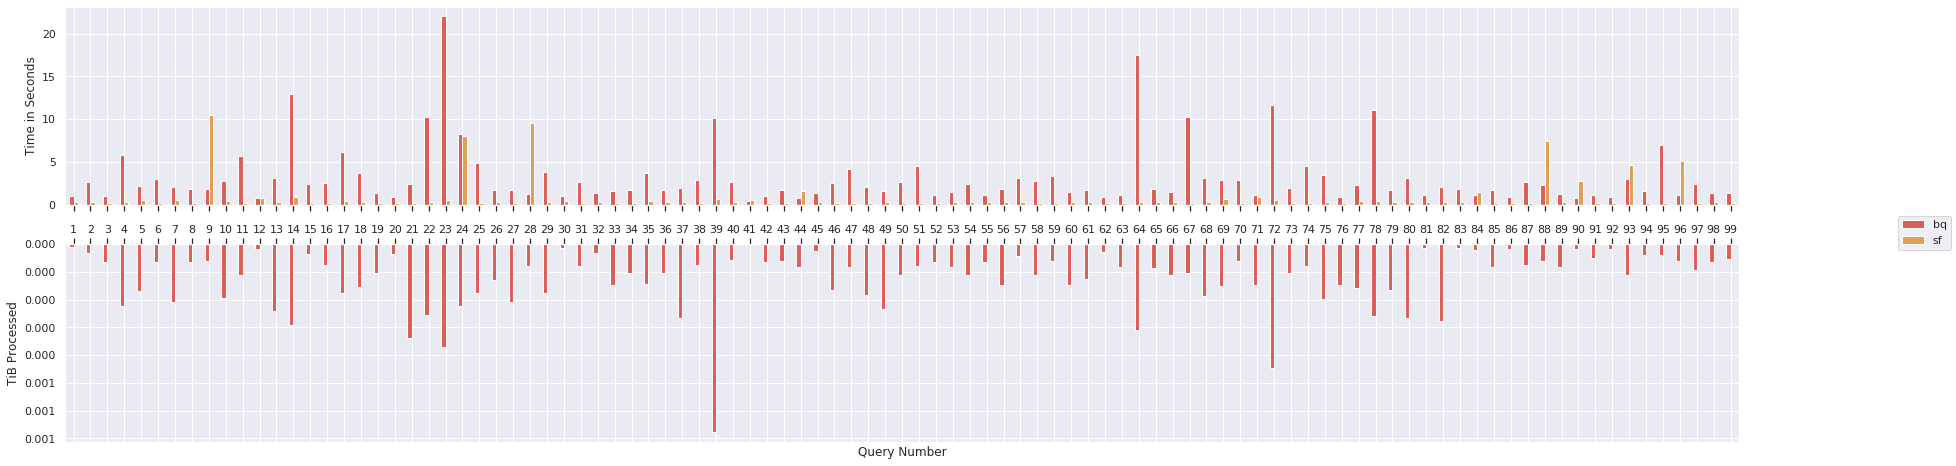

In [44]:
plot_name = "{}_{}GB_{}_comparison.png".format(test, scale_factor, x_type)

# invert bytes processed for plotting
_dfp_bp = dfp_bp.copy() * -1
color_palette = hls
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = dfp_dt.plot.bar(ax=ax1, legend=False, color=color_palette)
ax2 = _dfp_bp.plot.bar(ax=ax2, legend=False, color=color_palette);

# set the figure size BEFORE adjusting ticks
fig.set_size_inches(30, 8, forward=True)

handles, labels = ax1.get_legend_handles_labels()

ax1.set_ylabel("Time in Seconds")
ax1.set_xlabel(None)
ax1_xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(labels=[])

ax2.set_ylabel("TiB Processed")
ax2.set_xlabel("Query Number")
ticks =  ax2.get_yticks()
ticks = ["{:01.3f}".format(abs(tick)) for tick in ticks]
ax2.set_yticklabels(ticks);
ax2.xaxis.tick_top()

#plt.subplots_adjust(hspace=0.11)
#plt.subplots_adjust(right=0.79)

fig.legend(handles, labels, loc="right")
#fig.legend(handles, labels, loc="lower center")
plt.savefig(config.fp_plots + config.sep + plot_name, bbox_to_anchor='tight')
print();

In [21]:
dfp_dt.sum()

db
bq    56.206000
sf    28.677865
dtype: float64

In [22]:
dfp_bp.sum()

db
bq    3.759623e-03
sf   -2.000888e-11
dtype: float64

In [23]:
dfp_bp.sum() * 5

db
bq    1.879812e-02
sf   -1.000444e-10
dtype: float64